## ML SPECIALIZATION (COURSERA), Supervised Machine Learning Regression and Classification (Week->2)

#Linear Regression with Multiple features
$x_{j}$, with this each feature in the input (x) is denoted.(j=1 to n)

$x^i$(arrow on top of x to denote that its a vector of values in that $i^{th}$ row), This denotes the i$^{th}$ row in the data. n = total number of features.

$x^i_j$ this is to denote the specific value, it the $i^{th}
$ rows $j^{th}$ feature value


previously: $f_{(w,b)}$(x) = wx + b
has one feture x

now for multiple features in the input data
$f_{(w,b)}$(x)= $w_1x_1$ + $w_2x_2$ + $w_3x_3$ + $w_4x_4$ + b

for 4 features in the data, the above defines the function, that fits line to data considering all the features.

we can interpret it as each of the input features contribute in the prediction.
b can be interpreted as a base point of prediction??

General Notation:
$f_{(w,b)}$(x) = $w_1x_1$ + $w_2x_2$ + ... + $w_nx_n$ + b

$\vec{w}$ = $[w_1,w_2,w_3,...,w_4]$ , b are the parameters of the model

$\vec{x}$ = $[x_1,x_2,x_3,...,x_4]$

$f_{(\vec{w},b)}(\vec{x}) = w_1x_1 + w_2x_2 + ... + w_nx_n + b$

$f_{(\vec{w},b)}(\vec{x}) = \vec{w} . \vec{x} + b$

dot product allows to show the compact form of the expression. ('.' defines dot product)

its called "Multiple Linear Regression" with multiple features.







##Vectorization

to implement (w1x1+w2x2+...+wnxn+b) this,
1. it takes lot of typing to manually multiply and add them.
2. to use for loop for range(n) (n= number of features), and multiply and add the vector values, is using python, and still not much efficient
3. to use the numpy library(dot product), it uses the parallel computation and does this multiplication faster and in less code.

$numpy.dot(\vec{x},\vec{w}) + b$

using this vectorization while computing gradient descent, the updating of parameters to a next point towards the minimum point in cost function graph, the computation gets faster using parallel computation power of vectorization(numpy arrays),for any number of features (parameters).




In [50]:
import numpy as np
import time
# this is the implementation without vectorization we can see the computation time delay for larger data
w = np.random.rand(10000)
x = np.random.rand(10000)
n = len(w)
total = 0
tic = time.time()
for i in range(n):
  total+=w[i]*x[i]
toc = time.time()
time1 = toc-tic
print(total)
print(toc-tic)

2481.5841212046307
0.005696296691894531


In [51]:
# dot product using numpy library
import numpy as np
import time
tic = time.time()  # capture start time
res = np.dot(w,x)
toc = time.time()  #end time
time2 = toc-tic
print(res)
print(toc-tic)

2481.5841212046394
0.0006074905395507812


In [52]:
print(max(time1,time2))

0.005696296691894531


##The time taken by the pythoin implementation using loops is larger than the vectorized implementation.

The cost function now is

$J(\vec{w},b) = 1/2m Σ^{m-1}_{i=0} (f(\vec{x}^i)-y^i) ^ 2$

for the multiple feature linear regression

# Feature Scaling
"The features (consider two) if one feature has large range of values and the other has smaller range, then that causes a
smaller squeeshed graph on one axis and other have larger range, this causes the gradient descent to bounce off in the path many times before
reaching a minimum point in the cost function."

so if we scale the features to a comparable ranges the graphs will be more clear, the data distributes better and will have straight paths to the minimum.

this causes the gradient descent to work faster.

The is no harm in feature scaling, use that to
1. scale small values to become larger(normally in range of -1 to 1)
2. scale large range values to small, scale down to a compareable range with other ranges

methods used:
1. dividing by max value in range
2. mean Normalization
finding mean (mew) and calculating (x1-(mew1)/max-min) do this for all the values in the range.
3. Z-score normalization, in this standard deviation(sigma) and mean(mew) are calculated
x1 = (x1 - mew1)/sigma1
do this for all the range of values.
4. implement feature scaling for all the cases above mentioned, that makes the gradient descent to work faster.


## Checking the Gradient Descent, is it actually working or not? is it converging?

learning curve, this graph of CostFunction vs the iterations the Gradient Descent worked. this helps in understanding, if there are any bugs in the code or error in the alpha value that causing the model to not work properly, so this helps to make changes in the code to run the algo for certain iterations, from where the curve doent increase (algo doesnt learn, no use of further iterations),

the number of iterations it takes to converge is cant be determined it might take 1000 or 100,000 to converge.

automatic convergence test
where 'ε' epsilon (a small value its difficult to choose a correct value for this), in the learning curve if the learning is not much change that 'ε' value then, convergence point is reached.


## Right choice for the Learning Rate
1. if the learning rate is not a good value, the graph will inappropriate with increase, decrase of values( waves like) , this means the Gradient descent is not working properly, it might be taking larger steps due to large value of learning rate, so that it is not converging, it can also form a increasing curve for the large value of alpha.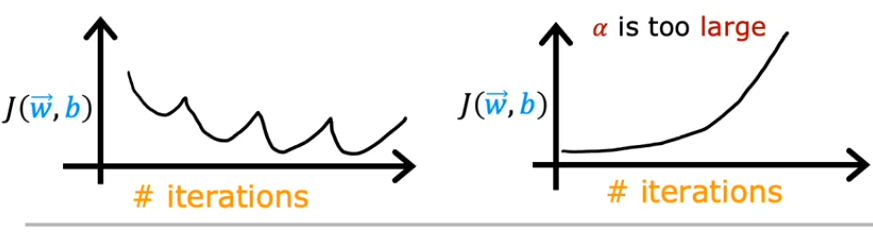


the correct learning rate should be the one that reduces with every step and at some point it converges.

a smaller value of alpha will take a lot more times to converge,
trying values of alpha starting from 0.001, increasing 10 times for the next value and so on until a fair large number 1. run for some iterations, that helps to understand the things better.

## Feature Engineering

using the original features of the input, transforming and combining them to form new features that help the ML Algo to make better predictions.

like if we predicting the price of a house , if we have features length and breadth then making a new feature area combining the length and depth will help the ML algo to better predict the price of the house.

## Polynomial Regression
combining the multiple linear Regression and the feature engineering to fit cures and other to the data , not just lines , until now we were fitting straight lines to our data.

using the squares and cubes(the polynomial functions) to fit cures, here due to the squares and cubes of a feature the values range differ so much, so the feature engineering plays a key role in here.

## using SGDRegressor (multiple Linear Regression) fot the Kaggle competition data of "House Price Competition for kaggle Learn Users"

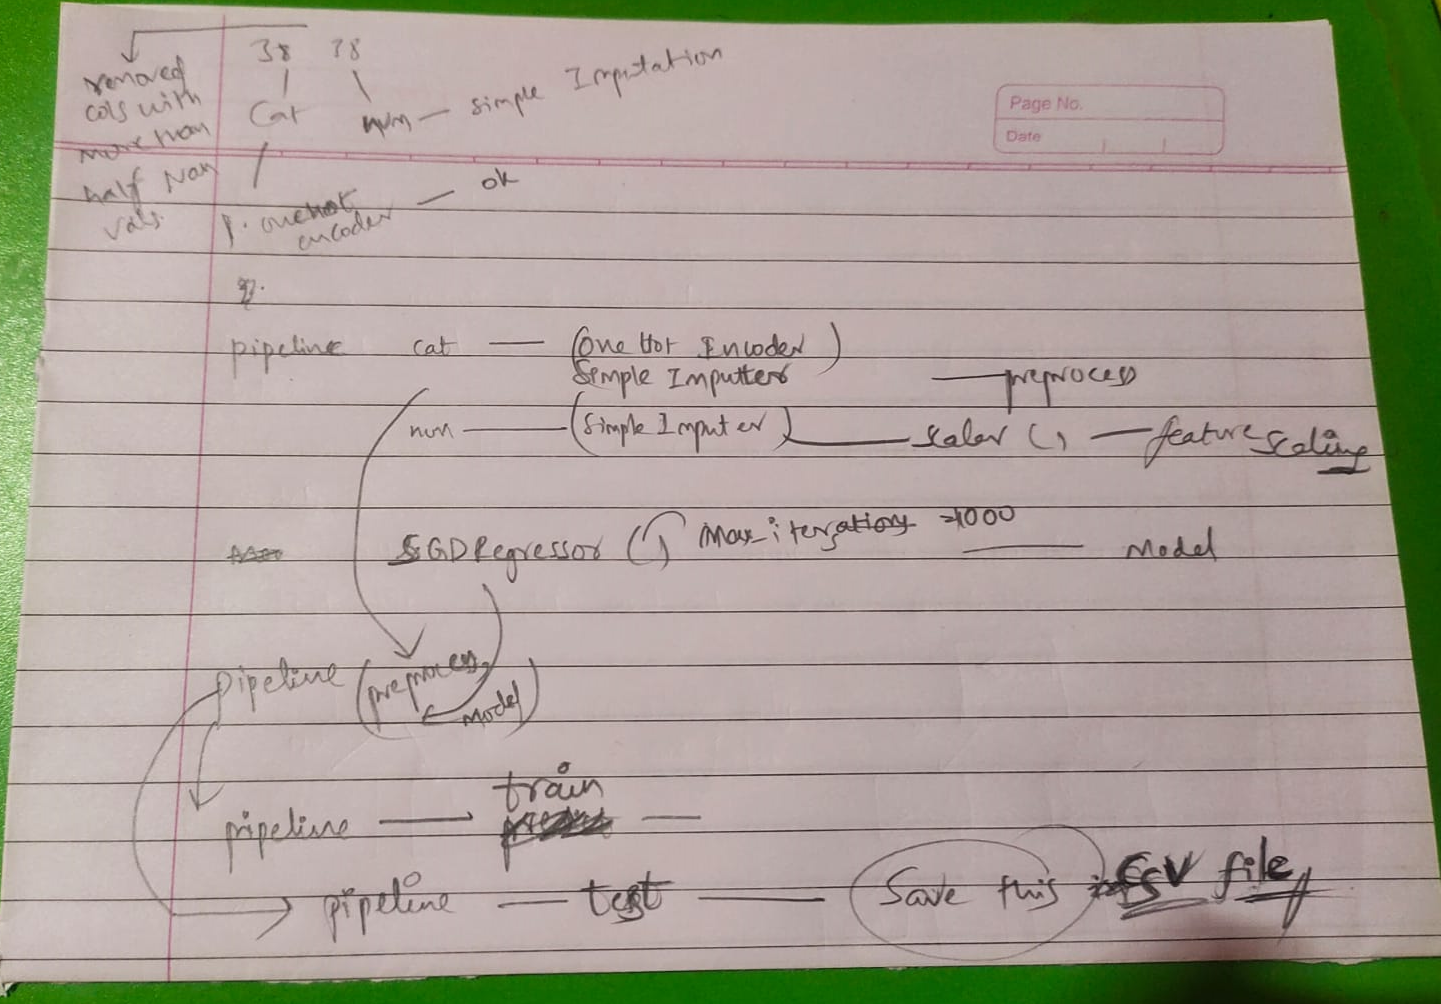

In [53]:
import pandas as pd
test = pd.read_csv("/content/test (1).csv")
train = pd.read_csv("/content/train (1).csv")

In [54]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [56]:
display(train.shape)
display(test.shape)

(1460, 81)

(1459, 80)

In [57]:
print(train.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [59]:
All_bad_columns = [col for col in train.columns if train[col].isna().sum() > 0]
print(All_bad_columns)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [60]:
bad_columns = [col for col in train.columns if train[col].isna().sum() > train.shape[0] // 2]
print(bad_columns)

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [61]:
trainx = train.drop(bad_columns, axis = 1)
trainx.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [62]:
trainx.reset_index
trainx.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [63]:
cat = [col for col in trainx.columns if trainx[col].dtype == "object"]
print(cat,len(cat))
num = [col for col in trainx.columns if trainx[col].dtype != "object"]
print(num,len(num))


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'

In [64]:
print([(trainx[col].nunique(),col) for col in cat])

[(5, 'MSZoning'), (2, 'Street'), (4, 'LotShape'), (4, 'LandContour'), (2, 'Utilities'), (5, 'LotConfig'), (3, 'LandSlope'), (25, 'Neighborhood'), (9, 'Condition1'), (8, 'Condition2'), (5, 'BldgType'), (8, 'HouseStyle'), (6, 'RoofStyle'), (8, 'RoofMatl'), (15, 'Exterior1st'), (16, 'Exterior2nd'), (4, 'ExterQual'), (5, 'ExterCond'), (6, 'Foundation'), (4, 'BsmtQual'), (4, 'BsmtCond'), (4, 'BsmtExposure'), (6, 'BsmtFinType1'), (6, 'BsmtFinType2'), (6, 'Heating'), (5, 'HeatingQC'), (2, 'CentralAir'), (5, 'Electrical'), (4, 'KitchenQual'), (7, 'Functional'), (5, 'FireplaceQu'), (6, 'GarageType'), (3, 'GarageFinish'), (5, 'GarageQual'), (5, 'GarageCond'), (3, 'PavedDrive'), (9, 'SaleType'), (6, 'SaleCondition')]


In [66]:
trainy = trainx['SalePrice']
trainy

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [67]:
trainx = trainx.drop('SalePrice', axis = 1)
trainx.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [69]:
num.remove('SalePrice')

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDRegressor


cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num),
        ('cat', cat_transformer, cat)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ("regressor", SGDRegressor(
        max_iter=1000,
        penalty="l2",
        alpha=0.0001,
        random_state=42
    ))
])

model.fit(trainx,trainy)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'Lo...
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', ...])])),
                ('regressor', SGDRegressor(random_state=42))])

In [75]:
testx = test.drop(bad_columns, axis = 1)
testx.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [76]:
predictions = model.predict(testx)
predictions

array([ 96618.97978413, 156183.59671223, 170509.91813724, ...,
       162222.24139778,  96751.63046944, 232769.04698107])

In [79]:
pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions}).to_csv('submission.csv', index=False)

##kaggle competition of "House prices competition for kaggle learners" got public score of (17,598.51010)

This error rate is expected as the data is non-linear and using a linear(line) Regressor for such doeant capture all features, other algos might work well(tree based worked better RandomForest, i tried before got around 16k public score).